# What are Design pattern?

- what are design patterns and wht are they useful
- how are they classified
- 

- A template for solving a common problem
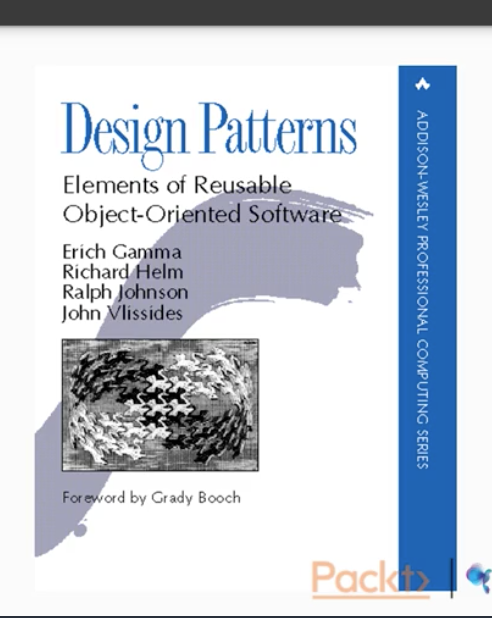

#### Why?
- no need to reinvent the wheel
- tested and proven
- more readable
- gives developers a common vocabulary

# Design pattern classification

- creational
- structural
- behavioral


- creational
  - factory
  - abstract factory
  - builder
  - prototype
  - singleton versus borg

- structural
  - MVC(model-view-controller)
  - Facade
  - proxy
  - decorator
  - adaptor
  
- behavioural
  - command
  - interpreter
  - state
  - chain of responsibility
  - strategy
  - observer
  - memento
  - template
  - reactive design patterns
  

# Advanced python topics

- iterables and iterators
- list comprehension
- wrapper functions

In [1]:
test_list = [1, 2, 3]
for i in test_list:
    print(i)

1
2
3


In [2]:
ite = test_list.__iter__()

In [3]:
ite

In [4]:
ite.__next__()

1

In [5]:
ite.__next__()

2

In [6]:
ite.__next__()

3

In [7]:
ite.__next__()

StopIteration: 

In [8]:
# list comprehension
numbers = [1, 2, 3, 4, 5]
numbers_multiplied = [n * 2 for n in numbers]

In [9]:
numbers_multiplied

[2, 4, 6, 8, 10]

- A decorator is a function that takes another function and extends the behaviour of the second function without explicitly modifying it
- can be reused across multiple functions (but does not apply to classes)
- functions are first-class objects, whitch means they can be defined in and returned by other functions

In [15]:
import time 

def timing_function(some_function):
    def wrapper():
        t1 = time.time()
        some_function()
        t2 = time.time()
        print(f"Time it took to run the functions : {t2 - t1}")
    return wrapper

@timing_function
def my_function():
    num_list = []
    for num in (range(0, 10000)):
        num_list.append(num)
    print(f"Sum of all the number : {sum(num_list)}")

In [14]:
my_function()

Sum of all the number : 49995000
Time it took to run the functions : 0.0013513565063476562


# Inheritance

- Basic 
- overwriting and overloading

- overriding is when a subclass can provide a different implementation of a method

In [22]:
class Pet(object):
    def __init__(self, name, species):
        self.name = name
        self.species = species
        
    def get_name(self):
        return self.name
    
    def get_species(self):
        return self.species
    
    def __str__(self):
        return f"{self.name} is a {self.species}"
    
    
class Dog(Pet):
    def __init__(self, name, chases_cats):
        super().__init__(name, "Dog")
        self.chases_cats = chases_cats
        
    def get_chases_cats(self):
        return self.chases_cats
    
    def __str__(self):
        additional_info = ""
        if self.chases_cats:
            additional_info = " who chases cats"
        return super().__str__() + additional_info
        

In [17]:
p = Pet('Polly', 'parrot')
p.__str__()

'Polly is a parrot'

In [21]:
d = Dog('Fred', True)
d.__str__()

'Fred is a Dog wo chases cats'

In [23]:
Dog.__bases__

(__main__.Pet,)

In [25]:
Pet.__subclasses__()

[__main__.Dog]

In [27]:
Dog.__mro__

(__main__.Dog, __main__.Pet, object)

In [28]:
class A(object):
    def __init__(self):
        print('A')
        
    @staticmethod
    def foo():
        print('foo')
        

class B(object):
    def __init__(self):
        print('B')
        
    @staticmethod
    def bar():
        print('bar')
    
    
class C(A, B):
    def foobar(self):
        self.foo()
        self.bar()

In [29]:
C.__mro__

(__main__.C, __main__.A, __main__.B, object)

In [34]:
c = C()
c.foobar()

A
foo
bar


# Producing with factory

- what a factory pattern is
- define an interface for creating an object,
- but defer object instantiation to run time.
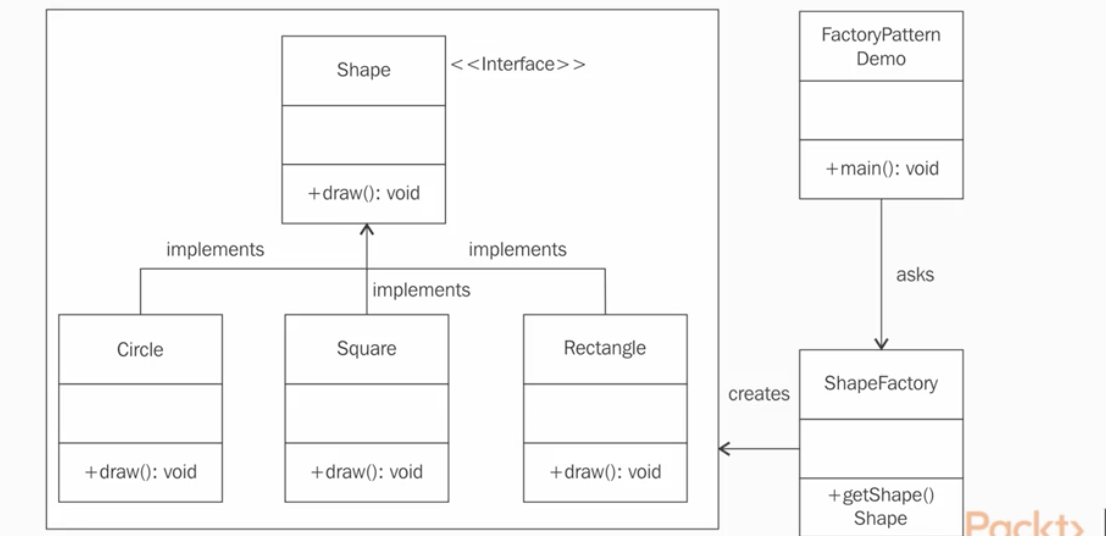

In [40]:
class ShapeInterface:
    def draw(self): pass
    

class Circle(ShapeInterface):
    def draw(self):
        print("Circle.draw")
        

class Square(ShapeInterface):
    def draw(self):
        print("Square.draw")
        
    
class ShapeFactory:
    @staticmethod
    def get_shape(_type):
        if _type == 'circle':
            return Circle()
        if _type == 'square':
            return 'square'
        assert 0, f"Could not find shape {_type}"

In [41]:
f = ShapeFactory()
s = f.get_shape('square')
s

'square'

# Abstract Factory

- provide an interface for creating families of related objects without specifying their concrete classes.

In [43]:
# Abstract
class Shape2DInterface:
    def draw(self): pass
    
    
class Shape3DInterface:
    def build(self): pass
    

# concreate shape 
class Circle(Shape2DInterface):
    def draw(self):
        print("Circle.draw")
        
    
class Square(Shape2DInterface):
    def draw(self):
        print("Square.draw")
        
    
class Sphere(Shape3DInterface):
    def build(self):
        print("Sphere.build")
        
        
class Cude(Shape3DInterface):
    def build(self):
        print("Cube.build")
        
        
# ABS shape factory
class ShapeFactoryInterface:
    def get_shape(sides): pass
    

class Shape2DFactory(ShapeFactoryInterface):
    @staticmethod
    def get_shape(sides):
        if sides == 1:
            return Circle()
        if sides == 4:
            return Square()
        assert 0, f"Bad 2D shape creation: shape not defined for {sides}"
        
    
class Shape3DFactory(ShapeFactoryInterface):
    @staticmethod
    def get_shape(sides):
        if sides == 1:
            return Sphere()
        if sides == 6:
            return Cube()
        assert 0, f"Bad 3D shape creation: shape not defined for {sides}"
        
    

# Builder

- Separate the construction of a complex object from its representation so that the same construction process can create different representations.

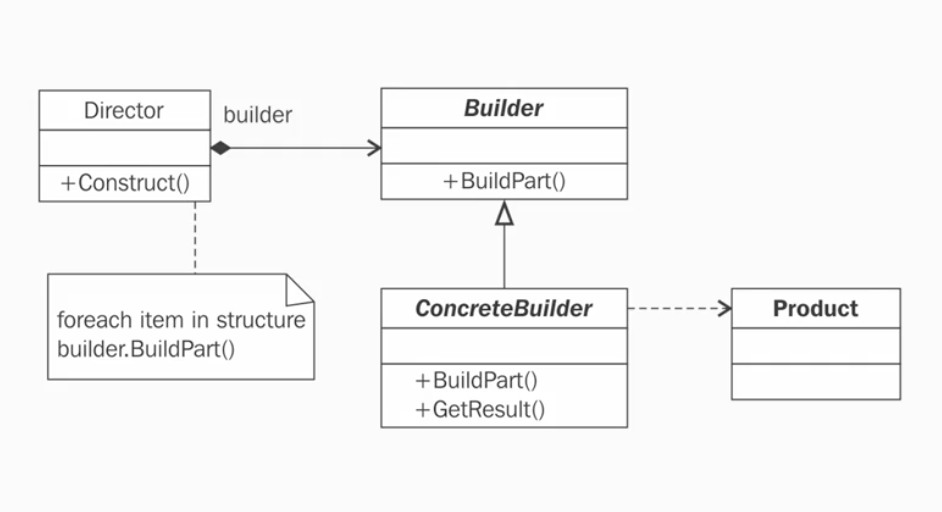

In [89]:
from copy import deepcopy

class Car:
    def __init__(self):
        self.__wheels = list()
        self.__engine = None
        self.__body   = None
        
    def set_body(self, body):
        self.__body = body
        
    def attach_wheel(self, wheel):
        self.__wheels.append(wheel)
        
    def set_engine(self, engine):
        self.__engine = engine
        
    def specification(self):
        print(f"body: {self.__body.shape}")
        print(f"engine horsepower: {self.__engine.horsepower}")
        print("tire size: {self.__wheels[0].size}")
        
    def clone(self):
        return deepcopy(self)
        
# parts
class Wheel:
    size = None
    

class Engine:
    horsepower = None
    

class Body:
    shape = None
    

class Director:
    __builder = None
    
    def set_builder(self, builder):
        self.__builder = builder
        
    def get_car(self):
        car = Car()
        
        body = self.__builder.get_body()
        car.set_body(body)
        
        engine = self.__builder.get_engine()
        car.set_engine(engine)
        
        i = 0
        while i < 4:
            wheel = self.__builder.get_wheel()
            car.attach_wheel(wheel)
            i += 1
            
        return car
        

In [86]:
class BuilderInterface:
    def get_wheel(self): pass
    def get_engine(self): pass
    def get_body(self): pass
    
    
class JeepBuilder(BuilderInterface):
    def get_wheel(self):
        wheel = Wheel()
        wheel.size = 22
        return wheel

    def get_engine(self):
        engine = Engine()
        engine.horsepower = 400
        return engine
    
    def get_body(self):
        body = Body()
        body.shape = "SUV"
        return body
    
    
class NissanBuilder(BuilderInterface):
    def get_wheel(self):
        wheel = Wheel()
        wheel.size = 16
        return wheel
    
    def get_engine(self):
        engine = Engine()
        engine.horsepower = 100
        return engine
    
    def get_body(self):
        body = Body()
        body.shape = "SUV"
        return body

In [87]:
d = Director()
d.set_builder(JeepBuilder())
d.get_car()

In [88]:
d.get_car().specification()

body: SUV
engine horsepower: 400
tire size: {self.__wheels[0].size}


# Prototype

- Specify the hind of objects to use a prototypical instance, and create new objects by copying this prototype.

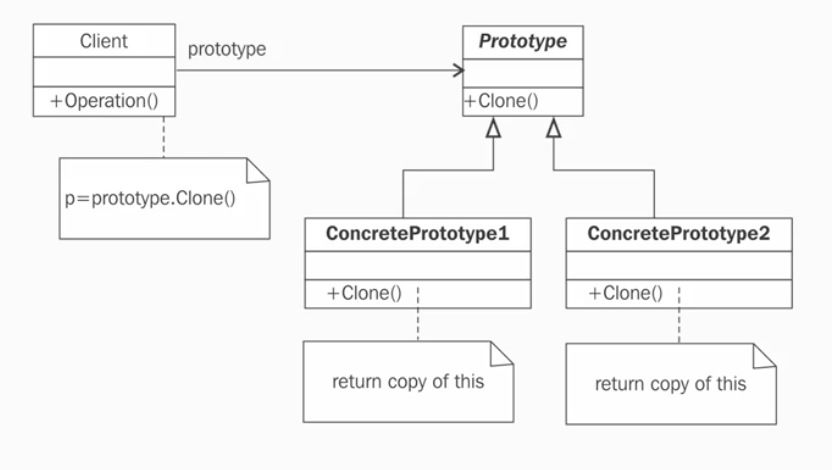

In [90]:
d = Director()
d.set_builder(JeepBuilder())
jeep = d.get_car()
jeep

In [91]:
jeep2 = jeep.clone()

In [92]:
jeep2

In [94]:
from copy import deepcopy

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __str__(self):
        print(f"{self.x}, {self.y}")
        
    def move(self, x, y):
        self.x += x
        self.y += y
        
    def clone(self, move_x, move_y):
        obj = deepcopy(self)
        obj.move(move_x, move_y)
        return obj

In [98]:
p = Point(1, 3)
p1 = p.clone(4, 5)
p1.__str__()

5, 8


# singleton versus borg

- ensures that a class has only one instance, and provide a global point of access to it, for example, a logging class
- the bord idiom lets a class have as many instances as one likes,bu ensures that they all share the same state
- \_\_new\_\_, \_\_init\_\_

In [101]:
class Singleton:
    __instance = None
    def __new__(cls, val=None):
        if Singleton.__instance is None:
            Singleton.__instance = object.__new__(cls)
        Singleton.__instance.val = val
        return Singleton.__instance

In [102]:
x = Singleton()
x.val = 'burger'
x.val

'burger'

In [103]:
y = Singleton()
y.val = 'chips'
y.val

'chips'

In [104]:
x.val

'chips'

In [105]:
x == y

True

In [106]:
class Borg:
    __shared_state = {}
    def __init__(self):
        self.__dict__ = self.__shared_state

In [107]:
b = Borg()
c = Borg()

In [108]:
b == c

False

In [109]:
b.val = 'milkshake'
c.val

'milkshake'

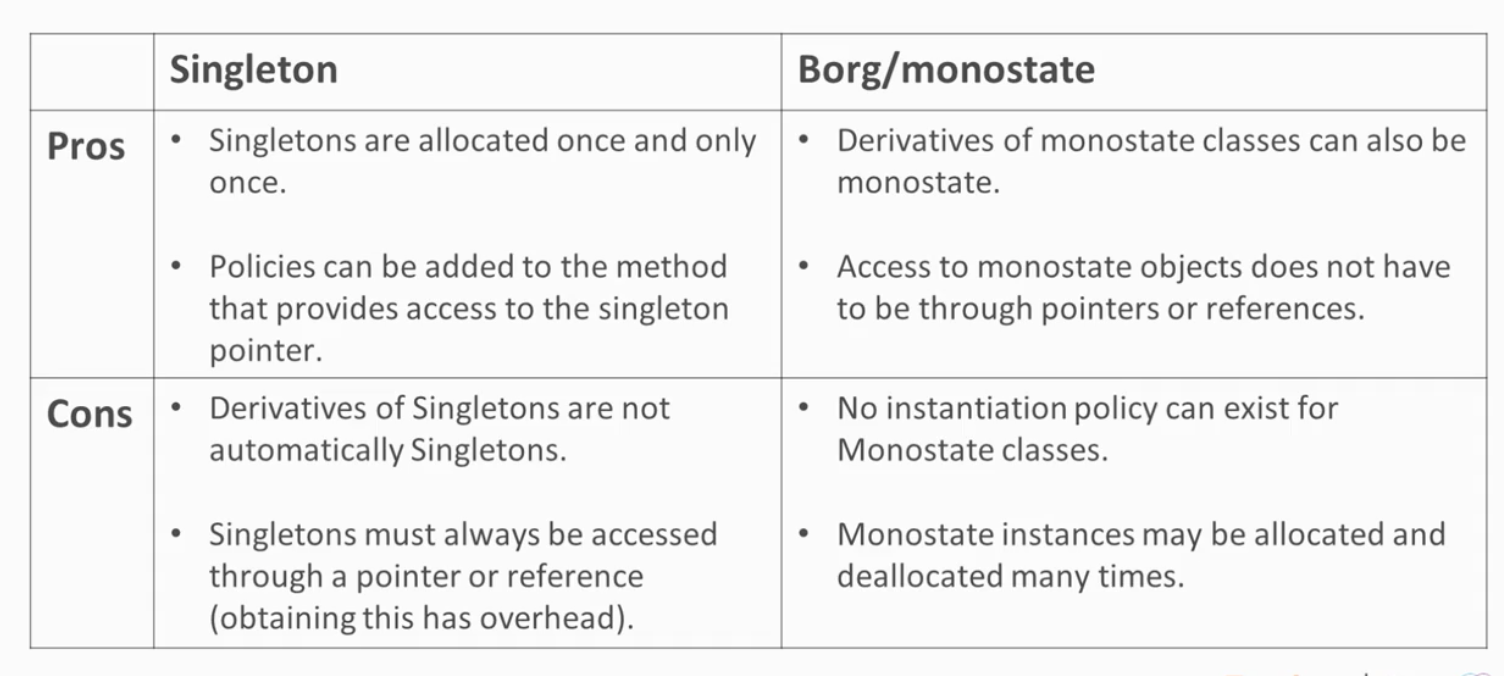

- Python modules are singletons

In [110]:
only_one = "the only one"

- It's pretty error-prone, for example, if you forget the global statements, variables local to a function will be created instead
- They pollute the module namespace
- No OOP benfitcs like associated methods or reuse

# Model view controller

- MVC is a UI pattern, intended to separate internal representations of data from the ways it is presented to/aceepted from the user.

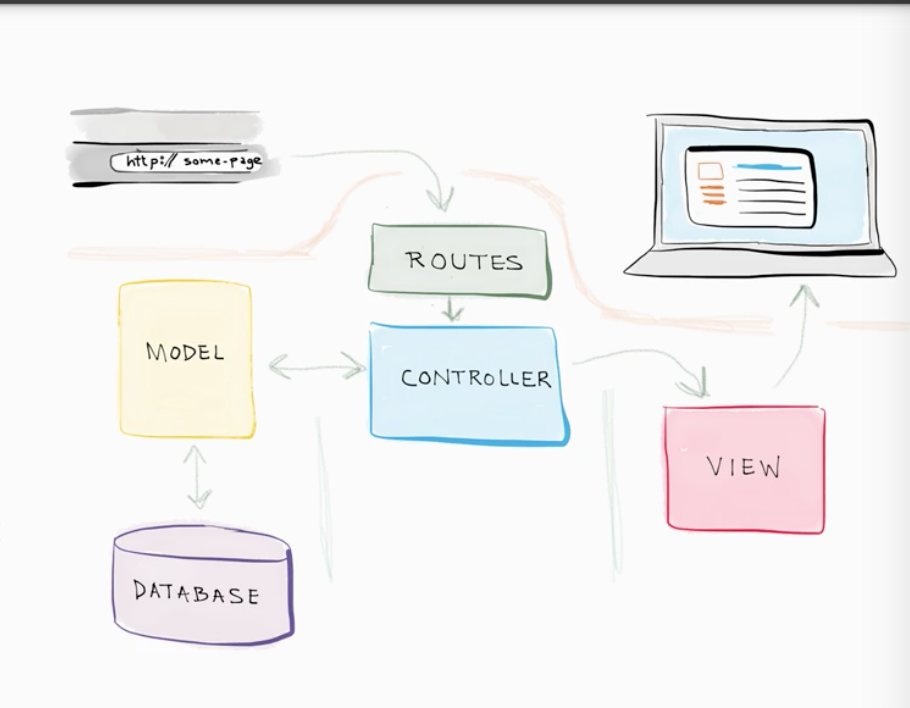

- A route maps the user request to a controller, which
- Uses the model to retrieve all of the necessary data, organizes it, and sends it off to the..
- View, which then uses that data to render the webpage

In [ ]:
@app.route('/')
def example_page():
    db = get_db()
    query = db.execute('select * from entries oerder by id desc')
    entries = query.fetchall()
    return render_template('exmaple_page.html', extries=entries)

# Facade

- Provide a unified interface to a set of interfaces in a subsystem. A facade defines a higher-level interface that makes the subsystem easier to use.

- Make a library easier to use, understand and test, since the facade has convenient methods for common tasks
- Reduce dependencies of outside code on the inner workings of a library, allowing more flexibility in developing the system
- Wrap a poorly designed collection of APIs with a single well-designed API

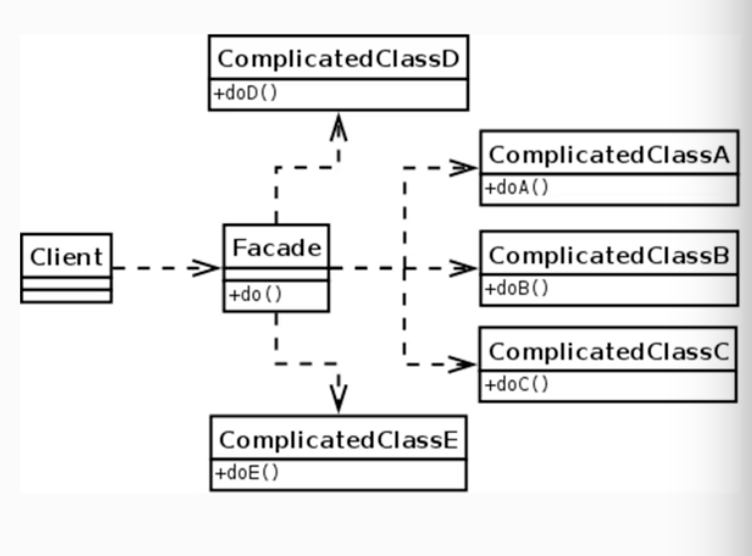

In [113]:
class Engine:
    def __init__(self):
        self.spin = 0
        
    def start(self, spin):
        self.spin = min(spin, 3000)
        
    
class StarterMotor:
    def __init__(self):
        self.spin = 0

    def start(self, charge):
        if (charge > 50):
            self.spin = 2500
        
class Battery:
    def __init__(self):
        self.charge = 0
        
    
class Car:
    def __init__(self):
        self.battery = Battery()
        self.starter = StarterMotor()
        self.engine  = Engine()
        
    def turn_key(self):
        self.starter.start(self.battery.charge)
        self.engine.start(self.starter.spin)
        if (self.engine.spin > 0):
            print('Engine started')
        else:
            print('Engine not started')
            
    def jump(self):
        self.battery.charge = 100
        print('Jumped')

In [114]:
c = Car()
c.turn_key()

Engine not started


In [ ]:
c.ju